# Team Project in Python - Data Science

Members: 
1. Anamika Mishra 
and 
2. Rohit Jayakumar Nair

Project : Predictive and Descriptive Analysis on the Google PlayStore  App  

Objective: The Google PlayStore apps data has enormous potential to help app-making businesses to increase their customer outreach and achieve success.
Meaningful insights can be drawn for developers to work on and capture the Android market, and decisions can be made to improve the business!
We have performed descriptive as well as predictive analysis on this dataset. Using descriptive analysis, we have answered business queries that can be used for making business decisions.
Using linear and non-linear predictive analysis, we have predicted the ratings and sentiments of the playstore apps 

Data: We have obtained this dataset from a public data source called Kaggle. 


1) Essential Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

2) Data Wrangling

Task: Acquire a dataset from the internet

In [29]:
#Load the Data
# Read the CSV File Using Pandas read_csv function
greview='C:/Users/anami/Documents/Python/Data Wrangling/DataSets/googleplaystore_user_reviews.csv'
gapp='C:/Users/anami/Documents/Python/Data Wrangling/DataSets/googleplaystore.csv'
apptype='C:/Users/anami/Documents/Python/Data Wrangling/DataSets/App_Type.csv'
GoogleApp = pd.read_csv(gapp)
GoogleReview = pd.read_csv(greview)
GoogleAppType = pd.read_csv(apptype)

In [30]:
print(GoogleApp.head())
print(GoogleReview.head())
print(GoogleAppType.head())


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs Price Content Rating                     Genres  \
0     159   19M      10,000+     0       Everyone               Art & Design   
1     967   14M     500,000+     0       Everyone  Art & Design;Pretend Play   
2   87510  8.7M   5,000,000+     0       Everyone               Art & Design   
3  215644   25M  50,000,000+     0           Teen               Art & Design   
4     967  2.8M     100,000+     0       Everyone    Art & Design;Creativity   

  Last Updated         Current Ver   A

Task :1) Create a dataset yourself to work with other data you found online
2) For each dataset acquired and used beyond the first 
Created AppType Dataset and merged it with the GoogleApp main dataset on App feature variable using inner join operation

In [31]:
#Join GoogleApp and Google App Type data set using Join method
GoogleApp = pd.merge(GoogleApp, GoogleAppType,on='App',how='inner')
GoogleApp

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,Free
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free
3,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free
4,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13714,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",0,Everyone,Education,25-Jul-17,1.48,4.1 and up,Free
13715,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,0,Everyone,Education,6-Jul-18,1,4.1 and up,Free
13716,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",0,Everyone,Medical,20-Jan-17,1,2.2 and up,Free
13717,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device,Free


3) Exploratory Data Analysis

In [32]:
#Summary of the movies dataset
GoogleApp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13719 entries, 0 to 13718
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             13719 non-null  object 
 1   Category        13719 non-null  object 
 2   Rating          12318 non-null  float64
 3   Reviews         13719 non-null  object 
 4   Size            13719 non-null  object 
 5   Installs        13719 non-null  object 
 6   Price           13719 non-null  object 
 7   Content Rating  13718 non-null  object 
 8   Genres          13719 non-null  object 
 9   Last Updated    13719 non-null  object 
 10  Current Ver     13711 non-null  object 
 11  Android Ver     13716 non-null  object 
 12  Type            13718 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.5+ MB


In [33]:
#Check the datatype of the columns to determine anomalies and datatype discrepencies
GoogleReview.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [34]:
#Analyze the data distribution of numerical features using describe function
GoogleApp.describe(include='all')


,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type
count,13719,13719,12318.000000,13719,13719,13719,13719,13718,13719,13719,13711,13716,13718
unique,9118,34,NaN,5667,454,22,92,6,115,1363,2648,33,3
top,ROBLOX,FAMILY,NaN,0,Varies with device,"10,000,000+",0,Everyone,Tools,31-Jul-18,Varies with device,4.1 and up,Free
freq,81,2142,NaN,573,3052,2054,12866,10530,843,605,2648,3098,12865
mean,NaN,NaN,4.234925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.486684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Analyze the data distribution of numerical features using describe function
GoogleReview.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


4) Data Wrangling

Rubric Task : For each plot included in your final deliverable(s)

GoogleApp null values App                  0
Category             0
Rating            1401
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
Type                 1
dtype: int64
GoogleReview null values 26863


(64295, 5)

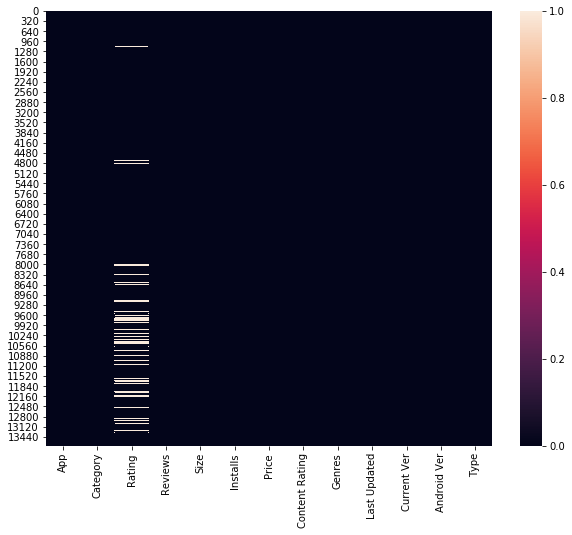

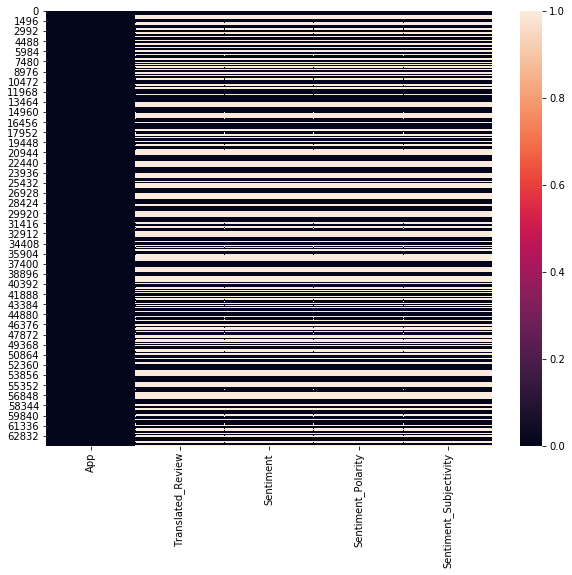

In [36]:
#Handling missing values
#GoogleApp
#Identify null values
print('GoogleApp null values',GoogleApp.isnull().sum())

#Define the plot figure
plt.figure(figsize=(10, 8))
#Heatmap to display the missing values vs observed values
sns.heatmap(GoogleApp.isnull())

#From the plot below, we can say that there are null values in Rating variable and a few missing values in Type, Content Rating , Current Ver and andoird version variables
GoogleApp.isnull().sum()

#GoogleReview
#Identify null values
print('GoogleReview null values',GoogleReview['Sentiment'].isnull().sum())
#Define the plot figure
plt.figure(figsize=(10, 8))
#Heatmap to display the missing values vs observed values
sns.heatmap(GoogleReview.isnull())

#From the plot below, we can say that there are null values in Rating variable and a few missing values in Type, Content Rating , Current Ver and andoird version variables
GoogleReview.isnull().sum()
GoogleReview.shape

In [37]:
# Update missing values

#Ratio of complete and incomplete observations w.r.t revenue and budget columns
Trows,Tcols = GoogleApp.shape
print('Approximately',(GoogleApp['Current Ver'].str.contains('Varies with device').sum()/Trows)*100,'% of the Current Version has garbage value')
print('Approximately',(GoogleApp['Rating'].isnull().sum()/Trows)*100,'% of the Rating is missing')


Approximately 19.30169837451709 % of the Current Version has garbage value
Approximately 10.212114585611195 % of the Rating is missing


In [38]:
#Update missing rating values with the median value ( since this is one of the crucial variable for exploratory data analysis,
#we are replacing the null values/ missing values with the meadian value of the variable)
GoogleApp['Rating'] = GoogleApp['Rating'].fillna(GoogleApp['Rating'].median())

#Similarly, missing values in the current version variable is being handled using mode function
GoogleApp['Current Ver'] = GoogleApp['Current Ver'].replace('Varies with device',np.nan)
GoogleApp['Current Ver'] = GoogleApp['Current Ver'].fillna(GoogleApp['Current Ver'].mode()[0])

GoogleApp['Android Ver'] = GoogleApp['Android Ver'].replace('Varies with device',np.nan)
GoogleApp['Android Ver'] = GoogleApp['Android Ver'].fillna(GoogleApp['Android Ver'].mode()[0])
# Removing NaN values
GoogleApp = GoogleApp.dropna(how='any',axis=0)

# Removing NaN values
GoogleReview = GoogleReview.dropna(how='any',axis=0)

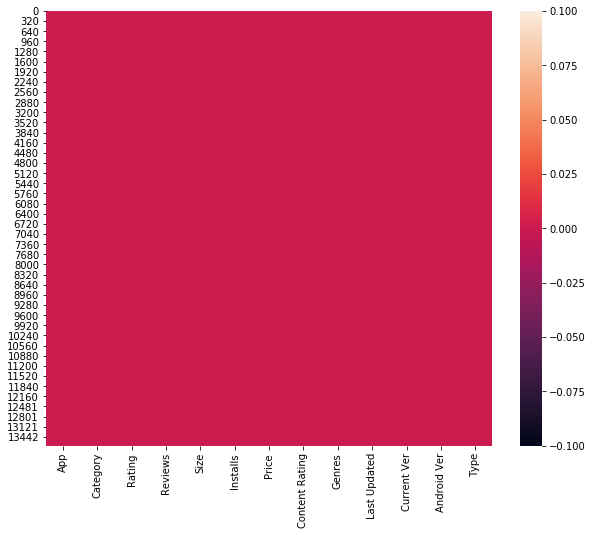

In [39]:
#Validating the dataset for observed Vs missing values
#Define the plot figure
plt.figure(figsize=(10, 8))
#Heatmap to display the missing values vs observed values
sns.heatmap(GoogleApp.isnull())

#From the plot below, we can say that there are no missing values in the dataset

Rubric Task: For each statistical metric (mean, median, mode) included in your final deliverable(s)

In [41]:
GoogleApp.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type
count,13717,13717,13717.000000,13717,13717,13717,13717,13717,13717,13717,13717,13717,13717
unique,9116,33,NaN,5666,453,20,91,6,114,1362,2646,32,2
top,ROBLOX,FAMILY,NaN,0,Varies with device,"10,000,000+",0,Everyone,Tools,31-Jul-18,1,4.1 and up,Free
freq,81,2141,NaN,572,3051,2054,12865,10530,843,605,3493,5482,12865
mean,NaN,NaN,4.240490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.444082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
print(GoogleApp.isnull().sum())
print(GoogleReview.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Type              0
dtype: int64
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


Rubric Task : For each statistical metric (mean, median, mode) included in your final deliverable(s)

In [43]:
#Summary of the movies dataset
#Check the datatype of the columns to determine anomalies and datatype discrepencies
GoogleApp.info()
GoogleApp.describe(include='all')
GoogleReview.info()
GoogleReview.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13717 entries, 0 to 13718
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             13717 non-null  object 
 1   Category        13717 non-null  object 
 2   Rating          13717 non-null  float64
 3   Reviews         13717 non-null  object 
 4   Size            13717 non-null  object 
 5   Installs        13717 non-null  object 
 6   Price           13717 non-null  object 
 7   Content Rating  13717 non-null  object 
 8   Genres          13717 non-null  object 
 9   Last Updated    13717 non-null  object 
 10  Current Ver     13717 non-null  object 
 11  Android Ver     13717 non-null  object 
 12  Type            13717 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,37427,37427,37427,37427.000000,37427.000000
unique,865,27994,3,NaN,NaN
top,Bowmasters,Good,Positive,NaN,NaN
freq,312,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182171,0.492770
std,NaN,NaN,NaN,0.351318,0.259904
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


In [44]:
#Check for duplicate data using duplicated method
# Select duplicate rows except first occurrence based on all columns
duplicateRowsGApp = GoogleApp[GoogleApp.duplicated()]
duplicateRowsGR = GoogleReview[GoogleReview.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsGApp)
print(duplicateRowsGR)


Duplicate Rows except first occurrence based on all columns are :
                                                 App             Category  \
2                                Coloring book moana       ART_AND_DESIGN   
4                                Coloring book moana               FAMILY   
26                            Mcqueen Coloring pages       ART_AND_DESIGN   
28                            Mcqueen Coloring pages               FAMILY   
42    UNICORN - Color By Number & Pixel Art Coloring       ART_AND_DESIGN   
...                                              ...                  ...   
7474         Mapy.cz - Cycling & Hiking offline maps  MAPS_AND_NAVIGATION   
7476                                            Uber  MAPS_AND_NAVIGATION   
7478                                            Uber  MAPS_AND_NAVIGATION   
7515         Moovit: Bus Time & Train Time Live Info  MAPS_AND_NAVIGATION   
7517         Moovit: Bus Time & Train Time Live Info  MAPS_AND_NAVIGATION   

      Rat

Rubric Task : use of merge operation

In [45]:
#Merge Google App and App Review datasets
GoogleStore = pd.merge(GoogleApp, GoogleReview,on='App')
GoogleStore

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Free,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212087,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",0,Everyone,Photography,6-Aug-18,1,4.1 and up,Free,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
212088,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",0,Everyone,Photography,6-Aug-18,1,4.1 and up,Free,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
212089,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",0,Everyone,Photography,6-Aug-18,1,4.1 and up,Free,Too much ads,Positive,0.200000,0.200000
212090,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",0,Everyone,Photography,6-Aug-18,1,4.1 and up,Free,Just allow time ...,Neutral,0.000000,0.000000


Rubric Task : Apply a function to your data

In [46]:
#Exploratory Data Analysis can be used to answer preliminary business queries, 
#understand data distribution in details and to further tune the data for predictive analysis
#Analyze the Applications with the high number of installs
GoogleStore['Installs'] = GoogleStore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

Rubric Task : Use group by function

In [47]:
#To achieve this objective , we will group the dataset based on application  and count the number of installs
GoogleStore['Installs'] = GoogleStore['Installs'].astype(int)

NewDS = GoogleStore.groupby('App')['Installs'].sum().reset_index()
final_result = NewDS.sort_values(by = 'Installs', ascending = False).head(10)
final_result

,App,Installs
292,Candy Crush Saga,5.880000e+12
663,Google Photos,3.056000e+12
660,Google News,1.872000e+12
709,Hangouts,1.824000e+12
436,Duolingo: Learn Languages Free,1.176000e+12
17,8 Ball Pool,1.073100e+12
723,Helix Jump,9.828000e+11
102,Angry Birds Classic,6.825000e+11
634,Gmail,5.760000e+11
224,Bowmasters,5.616000e+11


Rubric Task :  Melt or reshape your data

In [48]:
#Use of Melt/Pivot operation for further analysis
MGoogleApp = pd.melt(frame = GoogleStore, id_vars = "App",value_vars = ["Installs"])
MGoogleApp


,App,variable,value
0,Coloring book moana,Installs,500000
1,Coloring book moana,Installs,500000
2,Coloring book moana,Installs,500000
3,Coloring book moana,Installs,500000
4,Coloring book moana,Installs,500000
...,...,...,...
212087,A+ Gallery - Photos & Videos,Installs,10000000
212088,A+ Gallery - Photos & Videos,Installs,10000000
212089,A+ Gallery - Photos & Videos,Installs,10000000
212090,A+ Gallery - Photos & Videos,Installs,10000000


Rubric Task : For each plot included in your final deliverable(s)

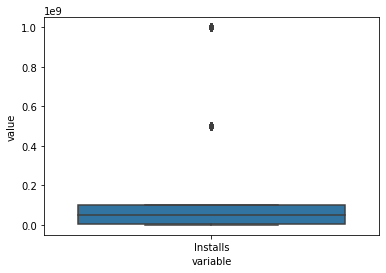

In [49]:
#Box Plot for identifying outliers
import matplotlib as mp
import seaborn as sns
sns.boxplot(x="variable",y="value",data=MGoogleApp)

Rubric Task : Use .apply function

In [50]:
#Use of .apply function to list app and total installs 
def ShowNumberOfInstalls(x):
    print(x)    
GoogleStore.groupby('App')['Installs'].sum().reset_index().apply(ShowNumberOfInstalls)


0                                  10 Best Foods for You
1                                                   11st
2                             1800 Contacts - Lens Store
3                           21-Day Meditation Experience
4                    2Date Dating App, Love and matching
                             ...                        
761    Hotels.com: Book Hotel Rooms & Find Vacation D...
762       Hotspot Shield Free VPN Proxy & Wi-Fi Security
763                                              Hotstar
764                       Hotwire Hotel & Car Rental App
765                       Housing-Real Estate & Property
Name: App, Length: 766, dtype: object
0      3.88e+08
1       3.9e+08
2       3.2e+08
3       3.2e+07
4       1.9e+07
         ...   
761    2.72e+09
762     1.7e+09
763     3.2e+09
764     3.3e+07
765     2.1e+07
Name: Installs, Length: 766, dtype: object


App         None
Installs    None
dtype: object

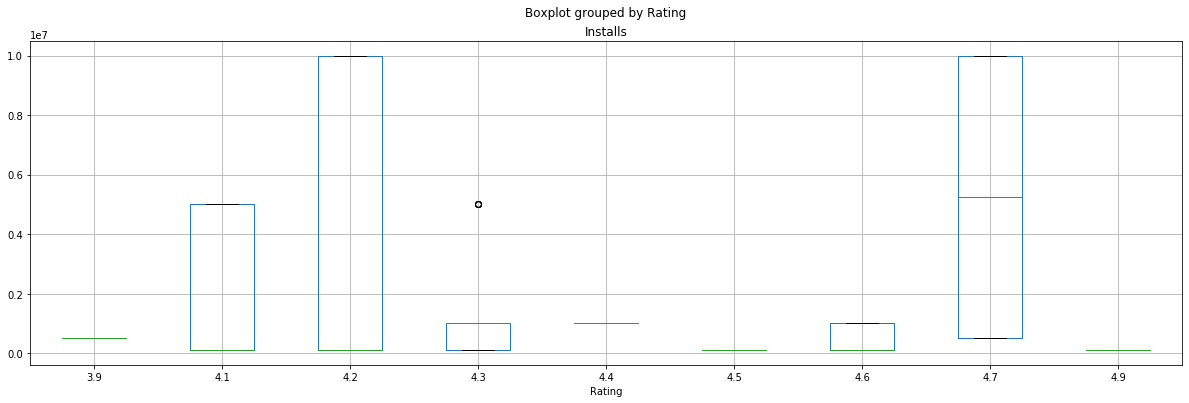

In [51]:
GoogleStore.head(75).describe
GoogleStore.dtypes
GoogleStore.head(1000).boxplot(column = "Installs", by = "Rating", figsize = (20,6))

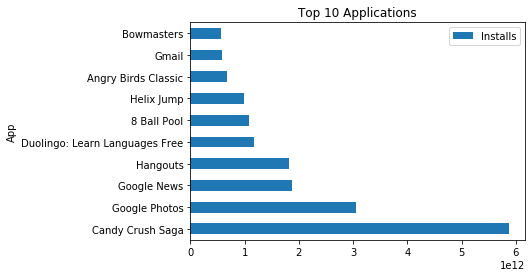

In [52]:
final_result.plot(kind='barh',x='App',y='Installs',title='Top 10 Applications')

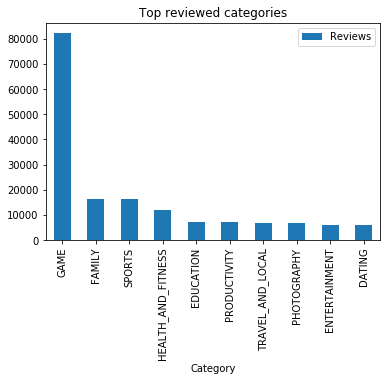

In [53]:
#Most popular category
ReviewCount = GoogleStore.groupby('Category').count()['Reviews'].reset_index()
final_result = ReviewCount.sort_values(by = 'Reviews', ascending = False).head(10)
final_result
final_result.plot(kind='bar',x='Category',y='Reviews',title='Top reviewed categories')

In [54]:
#Dropping categorical features and unused variables for now
GoogleStore = GoogleStore[['Rating', 'Reviews','Size', 'Installs', 'Price', 'Sentiment','Sentiment_Polarity','Sentiment_Subjectivity']]
GoogleStore.head()

,Rating,Reviews,Size,Installs,Price,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,3.9,967,14M,500000,0,Negative,-0.250,1.000000
1,3.9,967,14M,500000,0,Negative,-0.725,0.833333
2,3.9,967,14M,500000,0,Neutral,0.000,0.000000
3,3.9,967,14M,500000,0,Positive,0.500,0.600000
4,3.9,967,14M,500000,0,Negative,-0.800,0.900000


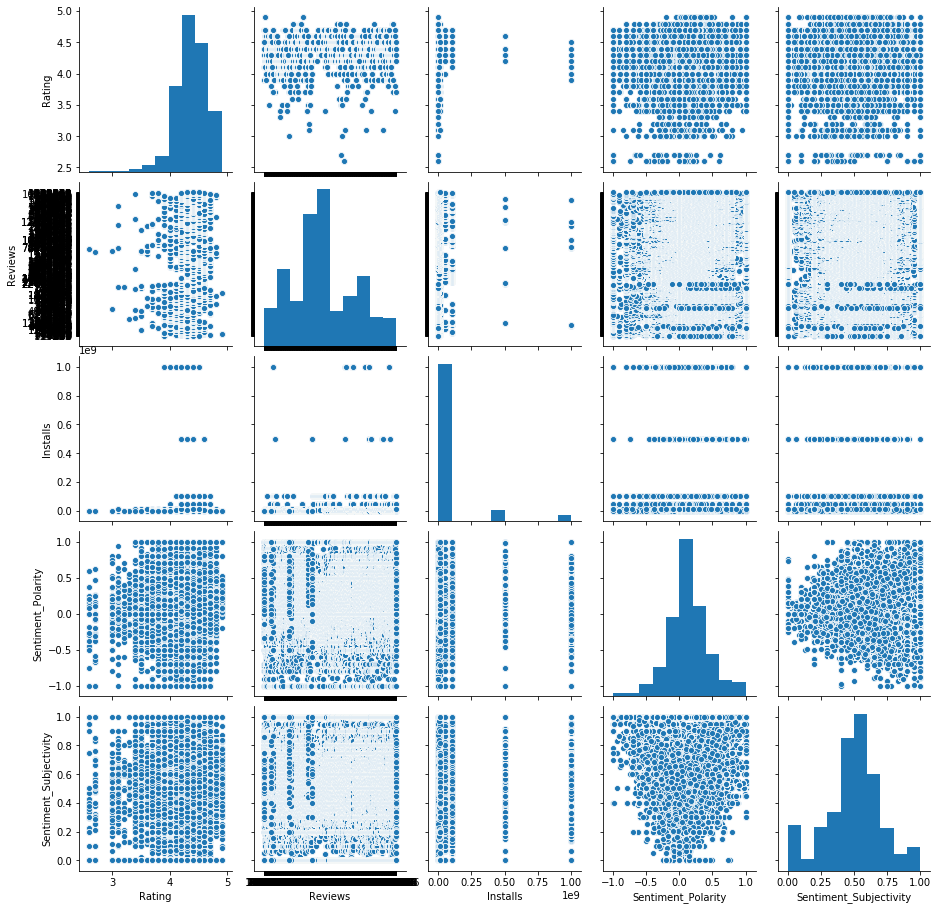

In [55]:
#Study the data distribution using pairsplot
sns.pairplot(GoogleStore)

Rubric Task : Each nonlinear model trained and used in your project

Variable Encoding for model building

In [56]:

replace_map = {'Sentiment': {'Positive': 1, 'Negative': -1, 'Neutral': 0}}
labels = GoogleStore['Sentiment'].astype('category').cat.categories.tolist()
replace_map_comp = {'Sentiment' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp)
GoogleStoreCopy = GoogleStore.copy()
GoogleStoreCopy.replace(replace_map_comp, inplace=True)
print(GoogleStoreCopy.head())

{'Sentiment': {'Negative': 1, 'Neutral': 2, 'Positive': 3}}
   Rating Reviews Size  Installs Price  Sentiment  Sentiment_Polarity  \
0     3.9     967  14M    500000     0          1              -0.250   
1     3.9     967  14M    500000     0          1              -0.725   
2     3.9     967  14M    500000     0          2               0.000   
3     3.9     967  14M    500000     0          3               0.500   
4     3.9     967  14M    500000     0          1              -0.800   

   Sentiment_Subjectivity  
0                1.000000  
1                0.833333  
2                0.000000  
3                0.600000  
4                0.900000  


In [57]:
#Splitting the dataset into input and output variable
input_var = GoogleStoreCopy[['Rating', 'Reviews', 'Installs','Sentiment_Polarity','Sentiment_Subjectivity']]
input_var.head()
output_var = GoogleStoreCopy['Sentiment']
output_var.head()

0    1
1    1
2    2
3    3
4    1
Name: Sentiment, dtype: int64

In [58]:
#Splitting the dataset into training and test
from sklearn.model_selection import train_test_split
input_vartrain, input_vartest, output_vartrain, output_vartest = train_test_split(input_var,output_var,random_state = 2)

In [59]:
#***************************************Model building*****************************************************
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
import numpy as np
lr = LogisticRegression()
lr.fit(input_vartrain,output_vartrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(max_depth=10)
tree.fit(input_vartrain,output_vartrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
#Random Forest Tree
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=10)
rf.fit(input_vartrain,output_vartrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
#Prediction and Model Analysis
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
#Logistic Regression
#model1 = lr.fit(Xtrain,ytrain)
PredictedVals=lr.predict(input_vartest)
print('Mean Absolute Error:', mean_absolute_error(output_vartest, PredictedVals))  
print('Mean Squared Error:', mean_squared_error(output_vartest, PredictedVals))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(output_vartest, PredictedVals)))
print('R2 : ',r2_score(output_vartest, PredictedVals))



Mean Absolute Error: 0.6647681194953133
Mean Squared Error: 1.2382550968447654
Root Mean Squared Error: 1.1127691121004237
R2 :  -0.5605715527954755


In [63]:
#Decision Tree Regression
#model1 = lr.fit(Xtrain,ytrain)
PredictedVals=tree.predict(input_vartest)
print('Mean Absolute Error:', mean_absolute_error(output_vartest, PredictedVals))  
print('Mean Squared Error:', mean_squared_error(output_vartest, PredictedVals))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(output_vartest, PredictedVals)))
print('R2 : ',r2_score(output_vartest, PredictedVals))


Mean Absolute Error: 0.0003206155819172812
Mean Squared Error: 0.00035833506214284365
Root Mean Squared Error: 0.01892974014990284
R2 :  0.9995483907106264


In [64]:
#RandomForest Regression
#model1 = lr.fit(Xtrain,ytrain)
PredictedVals=rf.predict(input_vartest)
print('Mean Absolute Error:', mean_absolute_error(output_vartest, PredictedVals))  
print('Mean Squared Error:', mean_squared_error(output_vartest, PredictedVals))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(output_vartest, PredictedVals)))
print('R2 : ',r2_score(output_vartest, PredictedVals))

Mean Absolute Error: 0.0003206155819172812
Mean Squared Error: 0.0003206155819172812
Root Mean Squared Error: 0.017905741590821676
R2 :  0.9995959285305605


Rubric Task : For each linear model trained and used in your project

In [65]:
#Linear Regression Modeling
#Splitting the dataset into input and output variable
input_var = GoogleStoreCopy[['Sentiment','Reviews', 'Installs','Sentiment_Polarity','Sentiment_Subjectivity']]
input_var.head()
output_var = GoogleStoreCopy['Rating']
output_var.head()

0    3.9
1    3.9
2    3.9
3    3.9
4    3.9
Name: Rating, dtype: float64

In [66]:
#Splitting the dataset into training and test
from sklearn.model_selection import train_test_split
input_vartrain, input_vartest, output_vartrain, output_vartest = train_test_split(input_var,output_var,random_state = 2)

In [67]:
from sklearn.linear_model import LinearRegression
import numpy as np
lrg = LinearRegression()
lrg.fit(input_vartrain,output_vartrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
PredictedVals=lrg.predict(input_vartest)
print('Mean Absolute Error:', mean_absolute_error(output_vartest, PredictedVals))  
print('Mean Squared Error:', mean_squared_error(output_vartest, PredictedVals))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(output_vartest, PredictedVals)))
print('R2 : ',r2_score(output_vartest, PredictedVals))


Mean Absolute Error: 0.177061744538768
Mean Squared Error: 0.058761340755656415
Root Mean Squared Error: 0.24240738593462124
R2 :  0.05983777041555893


Rubric Task: For each statistical metric (mean, median, mode) included in your final deliverable(s)

In [69]:
#Statistical Metric (Mean, Median , Mode)
print('Mean Predicted Review',PredictedVals.mean())
print('Mean Predicted Review',GoogleStore['Reviews'].mean())
print('Mean Predicted Review',GoogleStore['Reviews'].mode())


Mean Predicted Review 4.380772885752959
Mean Predicted Review inf
Mean Predicted Review 0    91031
dtype: object


Stretch Goals

1) Pull data from a web-based API (I recommend the Requests library) 

In [9]:
#import the libraries
import json
import requests

In [10]:
#Make a web API call
api_url_base = 'https://data.cincinnati-oh.gov/resource/pid3-z56k.json'
headers = {'Content-Type': 'application/json'}
def get_bid_info():
    response = requests.get(api_url_base, headers=headers)
    if response.status_code == 200:
        return json.loads(response.content.decode('utf-8'))
    else:
        return None

    

In [11]:
#Display the json data 
bid_info = get_bid_info()
labels =['bid_project_number','status','project_name','requesting_department','buyer','procurement_type','inclusion_goal','date_due','bid_booklet_pdf']
for i in range(2):
    print("Record Number:",i)
    for label in labels:
        print(label,":",bid_info[i][label])


Record Number: 0
bid_project_number : RFI435CPDSCHED
status : Cancelled
project_name : Overtime & Special Event Scheduling System
requesting_department : Police
buyer : Annette Gordon
procurement_type : Request for Information
inclusion_goal : N/A
date_due : 2016-01-21T16:00:00.000
bid_booklet_pdf : {'file_id': '964db63e-21da-4bed-a082-e6cdec3d3518', 'content_type': 'application/pdf; charset=binary', 'filename': 'RFI435CPDSCHED.pdf'}
Record Number: 1
bid_project_number : 161A901374
status : Awarded
project_name : Wood Survey Stakes
requesting_department : Various Agencies
buyer : Annette Gordon
procurement_type : Invitation to Bid
inclusion_goal : N/A
date_due : 2015-10-13T12:00:00.000
bid_booklet_pdf : {'file_id': 'KMjMjbxz6aY3tclTRwuBn_nGf2RrLRR0aolvK8XW9rM', 'content_type': 'application/pdf; charset=binary', 'filename': '161A901374.pdf'}


In [12]:
#load the json data in a json file
# Serializing json  
json_object = json.dumps(bid_info, indent = 4) 
# Writing to sample.json 
with open("bid_info.json", "w") as outfile: 
    outfile.write(json_object) 

In [14]:
#Display the json data in a dataframe
import pandas as pd
pd.read_json (r'bid_info.json')

,bid_project_number,status,project_name,requesting_department,buyer,procurement_type,inclusion_goal,date_due,bid_booklet_pdf,addendum_1_pdf,...,award_contract,award_contract3,supporting_doc_4_pdf,award_contract_4,specs_detailed_provisions_pdf,plan_holders_list_pdf,awarded_contract_5,awarded_contract_6,supporting_doc_5_pdf,prevailing_wage
0,RFI435CPDSCHED,Cancelled,Overtime & Special Event Scheduling System,Police,Annette Gordon,Request for Information,N/A,2016-01-21T16:00:00.000,{'file_id': '964db63e-21da-4bed-a082-e6cdec3d3...,{'file_id': 'a6f02e2a-5783-4834-a969-5c2cde656...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161A901374,Awarded,Wood Survey Stakes,Various Agencies,Annette Gordon,Invitation to Bid,N/A,2015-10-13T12:00:00.000,{'file_id': 'KMjMjbxz6aY3tclTRwuBn_nGf2RrLRR0a...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161R905055,Awarded,Gas Street Light Maintenance,Public Services,Annette Gordon,Invitation to Bid,15%,2015-09-30T12:00:00.000,{'file_id': '8065c5ed-b6b0-489a-9530-d544c14ac...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RFI433CFDDOCK,RFI Closed,River Side Boat Storage Lift of Dock,Fire,Annette Gordon,Request for Information,N/A,2015-12-28T15:00:00.000,{'file_id': 'PoPzZAa5YI2sGxuP-DzjS_kbqVHO3nLrd...,{'file_id': 'n5VMIPJR6JdJLn7fS65c_wZY9aZ-17WVw...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161A901288,Awarded,Luminaries,Public Services,Annette Gordon,Invitation to Bid,N/A,2015-10-07T12:00:00.000,{'file_id': 'dFi8T-wkqcngaUa8NbHnQBc6ExIrwM9UD...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,161R905451,Awarded,"Term Contract to Supply Plants, Trees, Shrubs,...",Parks,Nathan Dronen,Invitation to Bid,N/A,2015-10-08T12:00:00.000,{'file_id': '90792011-9255-4b3e-a9ee-2f977cad0...,{'file_id': '6f6f8c71-a2fd-4593-b4de-cea2dfaf3...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,161R905452,Awarded,Thermo Plastic Traffic Marking Material,Public Services,Nathan Dronen,Invitation to Bid,N/A,2016-02-16T12:00:00.000,{'file_id': 'c63c6e98-a35d-4345-bb14-5cfa58517...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,161A901351,Awarded,Replacement Air Filters and Frames,Public Services,Nathan Dronen,Invitation to Bid,N/A,2016-04-08T12:00:00.000,{'file_id': '8fc1527e-060d-4cc3-9287-378218fc1...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,161A911357,Cancelled,REBID: Sale of Scrapped Tires on a Monthly Basis,Public Services,Nathan Dronen,Invitation to Bid,N/A,2016-05-17T12:00:00.000,{'file_id': 'bd8ae109-958b-4718-9021-8ff1101b4...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2) Scrape data from a website using Beautiful Soup and/or Scrapy.

In [15]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [18]:
from bs4 import BeautifulSoup
with open("Example web scraping website.html") as ws:
    scrap = BeautifulSoup(ws)


In [19]:
scrap.head

<head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./Example web scraping website_files/cb=gapi.loaded_2"></script><script async="" src="./Example web scraping website_files/cb=gapi.loaded_1"></script><script async="" src="./Example web scraping website_files/cb=gapi(1).loaded_0"></script><script src="./Example web scraping website_files/event" type="text/javascript"></script><script src="./Example web scraping website_files/beacon.js.download"></script><script async="" src="./Example web scraping website_files/8bd58aeb-700a-4ac6-a4b8-2937296c028e" type="text/javascript"></script><script async="" src="./Example web scraping website_files/beacon.js(1).download"></script><script async="" src="./Example web scraping website_files/js" type="text/javascript"></script><script async="" src="./Example web scraping website_files/oct.js.download" type="text/javascript"></script><script async="" src="./Example web scraping website_files/5fa0222fd126d72

In [21]:
scrap.title

<title>Software Developer Jobs in Australia. Australia Software Developer Jobs. | Monster.com</title>

In [22]:
scrap.a

<a class="skip-main" href="https://www.monster.com/jobs/search/?q=Software-Developer&amp;where=Australia#mainContent">Skip to main content</a>

In [23]:
scrap.find_all('a')

[<a class="skip-main" href="https://www.monster.com/jobs/search/?q=Software-Developer&amp;where=Australia#mainContent">Skip to main content</a>,
 <a aria-label="Monster Home" class="navbar-brand" href="https://www.monster.com/">
 <div class="logo-new-branding-g-header" style="background-image:url( https://media.newjobs.com/global/img/monster-logo-h-teal.svg )"> </div>
 </a>,
 <a aria-expanded="false" aria-haspopup="true" class="navbar-icon-link loginLink1" href="https://login20.monster.com/?r=http%3a%2f%2fjobs.monster.com%2fsearch%2f%3fq%3dSoftware-Developer%26where%3dAustralia&amp;ch=MONS" role="button">
 <span>Sign In</span>
 </a>,
 <a aria-expanded="false" aria-haspopup="true" class="navbar-icon-link loginLink2" href="https://hiring.monster.com/?intcid=skr_LPF_TopNav_Employer&amp;ch=MONS" role="button">
 <span>For Employers</span>
 </a>,
 <a aria-expanded="false" aria-haspopup="true" class="dropdown-toggle" data-toggle="dropdown" href="https://www.monster.com/jobs/search/?q=Software